# Notebook Usage

<ul>
<li>Create an intact weekly level timeseries of the prices of products in /data exels
<li>This data will be visualized in the frontend react app
</ul>

#### Processing logic

1. Load all excels into a single dataframe
2. Create time periods (weeks, months) from start of data to end of data
3. For each product, (EAN-koodi) generate the time series
* Max price during time period
4. Make test visualization before frontend functionality

* Consider product grouping, could be useful e.g. if product has only slightly changed


In [534]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

Load data in and do basic processing

In [535]:
# Load in the excels using pandas
file_location = "..\data"

raw_data = pd.DataFrame()

for file_name in os.listdir(file_location):
    if file_name[-4:] == 'xlsx':
        print(file_name)
        df_one_file = pd.read_excel(f"{file_location}\{file_name}", skiprows=8)
        df_one_file["source"] = file_name
        raw_data = pd.concat([raw_data, df_one_file])
    

ostotietoraportti_aluoto.xlsx
ostotietoraportti_jluoto.xlsx


In [536]:
raw_data['EAN-KOODI'] = raw_data['EAN-KOODI'].astype(str)
raw_data = raw_data[~raw_data['EAN-KOODI'].isin(['200074546781','200088052865'])]

In [537]:
raw_data.head()

,PÄIVÄMÄÄRÄ,KELLONAIKA,TOIMIPAIKKA,TUOTERYHMÄ,TUOTENIMI,EAN-KOODI,Yksikköhinta € verollinen,Ostetut tuotteet (paino/kpl),Myyntihinta €,Alennukset €,OSTOT €,source
0,2021-06-30,15:08,PRISMA HYVINKÄÄ,Mehu- ja juoma-annospakkauks. lämpimästä,10 x Rainbow päärynäjuoma 2dl,6415712500894,2.15,1.0,2.15,0.0,2.15,ostotietoraportti_aluoto.xlsx
1,2021-06-30,15:08,PRISMA HYVINKÄÄ,Mehu- ja juoma-annospakkauks. lämpimästä,10 x Rainbow vadelma-mansikka juoma 2dl,6415712500887,2.15,1.0,2.15,0.0,2.15,ostotietoraportti_aluoto.xlsx
2,2020-01-24,18:12,PRISMA HYVINKÄÄ,Rakennussarjat,10918 Hinausauto LEGO,5702016618082,5.90,1.0,5.90,0.0,5.90,ostotietoraportti_aluoto.xlsx
3,2020-01-24,18:12,PRISMA HYVINKÄÄ,Rakennussarjat,10920 Elsan ja Olafin teekutsut LEGO,5702016618105,22.90,1.0,22.90,0.0,22.90,ostotietoraportti_aluoto.xlsx
4,2020-06-17,16:27,PRISMA MIKKELI,Rakennussarjat,11008 Palikat ja talot LEGO,5702016616590,22.90,1.0,22.90,0.0,22.90,ostotietoraportti_aluoto.xlsx


Identify top products based on total €


In [538]:
top_products = raw_data\
    .groupby(by=['EAN-KOODI']) \
    .agg({'Myyntihinta €': 'sum', 'TUOTENIMI':'max', 'TUOTERYHMÄ':'max'}) \
    .rename(columns={'Myyntihinta €':'total€'})

top_products = top_products.sort_values(by='total€', ascending=False).reset_index().head(50)
top_eanCodes = top_products['EAN-KOODI'].values

top_products

,EAN-KOODI,total€,TUOTENIMI,TUOTERYHMÄ
0,6430015538009,3103.22,Fazer Aito 1l ESL Gluteeniton Kaurajuoma,Kasvipohjaiset juomat
1,6414893500167,1463.53,Kotimaista naudan jauheliha 17 % 700 g,Tuore valintaliha
2,6438348001566,1238.60,Kotimaista Kaurajuoma ESL 1l,Kasvipohjaiset juomat
3,6407810014397,1188.18,Atria Kanan Ohut Fileeleike Pehmeän Pippurinen...,Tuore valintaliha
4,7310100703347,1170.85,Semper Fruktmums Persikka 6kk hedelmäsose 110g,Lastenruoat
5,7310100703262,1141.66,Semper Fruktmums Vadelma 6kk hedelmäsose 110g,Lastenruoat
6,6408430039432,1074.79,Valio Oltermanni® e1 kg,Perusjuustopalat
7,6413605015210,941.36,"4 x Pepsi Max virvoitusjuoma 2,0 l",Virvoitusjuomat
8,2000503600002,739.38,Chiquita-banaani,Hedelmät
9,7322541090580,726.27,"Libero Up&Go housuvaippa koko 6, 13-20 kg, 56 kpl",Vauvanvaipat


Create product dimension based on top products

In [539]:
# Product dimension
D_Product = top_products[['TUOTENIMI', 'TUOTERYHMÄ', 'EAN-KOODI']].reset_index(drop=True)
D_Product = D_Product.rename(columns={'TUOTERYHMÄ':'productGroup', 'TUOTENIMI':'productName', 'EAN-KOODI':'eanCode'})
D_Product.head()

,productName,productGroup,eanCode
0,Fazer Aito 1l ESL Gluteeniton Kaurajuoma,Kasvipohjaiset juomat,6430015538009
1,Kotimaista naudan jauheliha 17 % 700 g,Tuore valintaliha,6414893500167
2,Kotimaista Kaurajuoma ESL 1l,Kasvipohjaiset juomat,6438348001566
3,Atria Kanan Ohut Fileeleike Pehmeän Pippurinen...,Tuore valintaliha,6407810014397
4,Semper Fruktmums Persikka 6kk hedelmäsose 110g,Lastenruoat,7310100703347


Create the timestamps as the baseline for price time series

In [540]:
mindate = raw_data['PÄIVÄMÄÄRÄ'].min()
maxdate = raw_data['PÄIVÄMÄÄRÄ'].max()

date_range = pd.date_range(start=mindate, end=maxdate)

date_range = pd.DataFrame(date_range)
date_range = date_range.rename(columns={0:'date'})

Define function for creating price history for a product

In [541]:
def price_history_for_product(ean_code:int, product_transactions:pd.DataFrame, dates_df:pd.DataFrame) -> pd.DataFrame:
    """
    Fills the gaps in the transactions dataframe
    """
    # Get max price for each day (if multiple rows for one day)
    product_daily_prices = product_transactions.groupby('PÄIVÄMÄÄRÄ').agg({'Yksikköhinta € verollinen': 'max'})
    product_daily_prices['eanCode'] = ean_code

    # left join product daily price with the date range
    product_daily_prices_full = pd.merge(left=dates_df, right=product_daily_prices, left_on='date', right_on='PÄIVÄMÄÄRÄ', how='left')

    product_daily_prices_full_final = product_daily_prices_full.sort_values(by='date').ffill(limit=100)
    # product_daily_prices_full_final = product_daily_prices_full.bfill() # Fill the first blank dates of the time series

    return product_daily_prices_full_final


Create the price histories for all products

In [542]:
# Get max price for each day for a product
price_history_all_products = None
ean_codes = top_eanCodes

for ean_code in ean_codes:
    # Filter with current product
    product_transactions = raw_data[raw_data['EAN-KOODI'] == ean_code]
    # Get price history for current product
    one_product_history = price_history_for_product(ean_code, product_transactions, date_range)
    
    # Append data into the price_history_all_products Spark DataFrame
    if price_history_all_products is None:
        price_history_all_products = one_product_history
    else:
        price_history_all_products = pd.concat([price_history_all_products, one_product_history])

# add Tuoteryhmä and TuoteNimi
price_history_all_products = price_history_all_products.merge(D_Product, on='eanCode', how='left')
price_history_all_products = price_history_all_products.rename(columns={'Yksikköhinta € verollinen': 'unitPrice'})
price_history_all_products = price_history_all_products.dropna(subset=['eanCode'])
price_history_all_products['date'] = price_history_all_products['date'].astype(str)

price_history_all_products.sample(10)

,date,unitPrice,eanCode,productName,productGroup
54636,2023-02-09,2.79,6413600015161,"2 x Pepsi Max virvoitusjuoma 1,5 l",Virvoitusjuomat
59839,2021-03-10,3.98,6415715101388,Rainbow kirjolohisuikale miedosti suolattu 300g,Tuore kala valinta
3637,2023-07-28,6.95,6414893500167,Kotimaista naudan jauheliha 17 % 700 g,Tuore valintaliha
80145,2022-11-26,27.90,2396004000008,Rainbow Savustettu lohifileepala n 300g,Kalavalmisteet valinta
85901,2022-07-01,0.95,6430104920500,Apetit Herne-maissi-porkkana pakaste 200g,Kasvispakasteet
38810,2022-11-19,9.49,6413200330404,LOTUS Soft Embo wc-paperi 16 rll,Wc-paperit
95878,2022-11-15,2.98,6408430408313,Valio Oddlygood® kaurapohjainen gurtti 1 kg va...,Jogurtti
50786,2023-05-06,1.09,6430015538085,"Fazer Aito Kauraruoka 2,5dl gluteeniton kaurav...",Ruoanv ja leivontatuotteet maitotal
35496,2019-03-14,1.79,6410380097752,Oolannin muusiperuna 400g,Perunapakasteet
63500,2020-06-08,1.97,2000522100002,Päärynä Conference I Hollanti,Hedelmät


Create basic KPIs for each product

In [543]:
# price_history_all_products.groupby(by='date')['unitPrice'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
# firstPrice, lastPrice, maxPrice, minPrice, priceChange

# Filter raw_data to have top_eanCodes
raw_data_filtered = raw_data[raw_data['EAN-KOODI'].isin(ean_codes)].reset_index(drop=True)
product_aggregates = raw_data_filtered.groupby(by='EAN-KOODI').agg(
        min_price=('Yksikköhinta € verollinen','min'),
        max_price=('Yksikköhinta € verollinen', 'max'))

first_price_indexes = raw_data_filtered.groupby('EAN-KOODI')['PÄIVÄMÄÄRÄ'].idxmin()
first_prices = raw_data_filtered.loc[first_price_indexes][['Yksikköhinta € verollinen', 'EAN-KOODI']]
first_prices = first_prices.rename(columns={'Yksikköhinta € verollinen': 'first_price'})

last_price_indexes = raw_data_filtered.groupby('EAN-KOODI')['PÄIVÄMÄÄRÄ'].idxmax()
last_prices = raw_data_filtered.loc[last_price_indexes][['Yksikköhinta € verollinen', 'EAN-KOODI']]
last_prices = last_prices.rename(columns={'Yksikköhinta € verollinen': 'last_price'})

product_aggregates = pd.merge(left=product_aggregates, right=first_prices, on='EAN-KOODI', how='left')
product_aggregates = pd.merge(left=product_aggregates, right=last_prices, on='EAN-KOODI', how='left')

product_aggregates['price_change_percentage'] = (product_aggregates['last_price'] / product_aggregates['first_price']) * 100 - 100

product_aggregates['price_change_€'] = product_aggregates['last_price'] - product_aggregates['first_price']

product_aggregates = product_aggregates.rename(columns={'EAN-KOODI': 'eanCode'})
product_aggregates = pd.merge(left=product_aggregates, right=D_Product, on='eanCode', how='left')
product_aggregates.sort_values(by='price_change_percentage', ascending=False, inplace=True)
product_aggregates.head(40)

,eanCode,min_price,max_price,first_price,last_price,price_change_percentage,price_change_€,productName,productGroup
0,2000041000005,0.95,2.09,0.98,1.99,103.061224,1.01,Appelsiini Navelina Espanja,Hedelmät
25,6413600015161,1.18,3.59,1.82,3.15,73.076923,1.33,"2 x Pepsi Max virvoitusjuoma 1,5 l",Virvoitusjuomat
2,2000522100002,1.69,3.99,1.88,2.99,59.042553,1.11,Päärynä Conference I Hollanti,Hedelmät
20,6410380097752,1.79,2.79,1.79,2.79,55.865922,1.00,Oolannin muusiperuna 400g,Perunapakasteet
21,6411300000494,2.95,6.49,3.89,6.05,55.526992,2.16,Paulig Juhla Mokka kahvi suodatinjauhatus 500g,Kahvit ja suodatinpaperit
1,2000503600002,0.89,1.89,1.29,1.88,45.736434,0.59,Chiquita-banaani,Hedelmät
17,6409100060916,1.45,2.09,1.45,2.09,44.137931,0.64,HK Popsi® Grillinakki 300 g,Tuoreet lihavalmisteet valinta
5,2393064000009,8.94,19.90,13.90,19.89,43.093525,5.99,Rainbow lohifilee 800-1400g vac n10kg,Tuore kala valinta
19,6409620364501,2.39,3.55,2.39,3.39,41.841004,1.00,Snellman Kinkkusuikaleet 300g,Tuoreet lihavalmisteet valinta
22,6411402202406,1.79,2.49,1.79,2.49,39.106145,0.70,"Fazer Puikula Kaura 9kpl 550g, kauraleipä",Vaaleat leivät


Create quantiles of priceChangePercentage based on product price history full

In [544]:
quantiles = [0.0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
price_history_quantiles = price_history_all_products.merge(product_aggregates[['first_price', 'eanCode']], how='left', on='eanCode')
price_history_quantiles['price_change_percentage'] = price_history_quantiles['unitPrice'] / price_history_quantiles['first_price'] * 100 - 100
price_history_quantiles = price_history_quantiles.groupby(by='date')['price_change_percentage'].quantile(quantiles).reset_index()
price_history_quantiles.columns = ['date', 'quantile', 'price_change_percentage']

def custom_round(x, base=5):
    return float(int(base * round(float(x)/base)))


price_history_quantiles['price_change_percentage'] = price_history_quantiles['price_change_percentage'].apply(lambda x: custom_round(x, 2))

price_history_quantiles = price_history_quantiles.pivot(columns='quantile', values='price_change_percentage', index='date')

# Smoothen the curves by applying rolling mean and bfill() to each column

for col in price_history_quantiles.columns:
    
    price_history_quantiles[col] = price_history_quantiles[col].rolling(window=90).mean() 
    price_history_quantiles[col] = price_history_quantiles[col].bfill() 

price_history_quantiles['Q_0_100'] = price_history_quantiles.apply(lambda x: [x[0.0], x[1]], axis=1)
price_history_quantiles['Q_10_90'] = price_history_quantiles.apply(lambda x: [x[0.10], x[0.90]], axis=1)
price_history_quantiles['Q_25_75'] = price_history_quantiles.apply(lambda x: [x[0.25], x[0.75]], axis=1)
price_history_quantiles['Q_50'] = price_history_quantiles[0.5].astype(float)  # Ensure this is a float



price_history_quantiles = price_history_quantiles.drop(columns=quantiles)
price_history_quantiles = price_history_quantiles.reset_index()

price_history_quantiles

quantile,date,Q_0_100,Q_10_90,Q_25_75,Q_50
0,2019-01-04,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
1,2019-01-05,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
2,2019-01-06,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
3,2019-01-07,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
4,2019-01-08,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
...,...,...,...,...,...
1960,2024-05-17,"[-11.555555555555555, 99.33333333333333]","[0.0, 51.644444444444446]","[8.866666666666667, 38.0]",23.888889
1961,2024-05-18,"[-11.688888888888888, 99.0]","[0.0, 51.666666666666664]","[8.88888888888889, 38.0]",23.822222
1962,2024-05-19,"[-11.822222222222223, 98.66666666666667]","[0.0, 51.68888888888889]","[8.911111111111111, 38.0]",23.755556
1963,2024-05-20,"[-11.955555555555556, 98.33333333333333]","[0.0, 51.71111111111111]","[8.933333333333334, 38.0]",23.688889


Plotting data for validation

C:\Users\Antti Luoto\AppData\Local\Temp\ipykernel_2736\3928160541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_history_all_products['date'] = pd.to_datetime(price_history_all_products['date'])


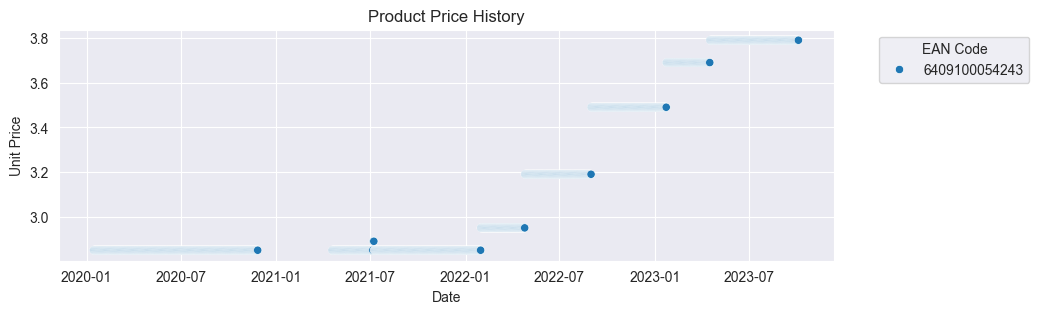

In [545]:
import seaborn as sns
def plot_product_prices(price_history_all_products:pd.DataFrame) ->None:
    # Set the figure size for better readability
    plt.figure(figsize=(10, 3))

    # Ensure 'date' is in the datetime format
    price_history_all_products['date'] = pd.to_datetime(price_history_all_products['date'])

    # Create a line plot with Seaborn, where each line represents a unique 'eanCode'
    sns.scatterplot(data=price_history_all_products, x='date', y='unitPrice', hue='eanCode', markers=True)

    # Enhance the plot with a title and labels
    plt.title('Product Price History')
    plt.xlabel('Date')
    plt.ylabel('Unit Price')
    plt.legend(title='EAN Code', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

    # Show the plot
    plt.show()

# plot_product_prices(price_history_all_products[price_history_all_products['eanCode'] == '6414893500167'])
plot_product_prices(price_history_all_products[price_history_all_products['productName'] == 'Kevyt linja meetvursti 100 g'])

In [546]:
# price_history_all_products[price_history_all_products['productName'] == 'Kevyt linja meetvursti 100 g'].ffill().tail()

Save data as json

In [547]:
price_history_quantiles

quantile,date,Q_0_100,Q_10_90,Q_25_75,Q_50
0,2019-01-04,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
1,2019-01-05,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
2,2019-01-06,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
3,2019-01-07,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
4,2019-01-08,"[-22.6, 24.444444444444443]","[-6.155555555555556, 2.7777777777777777]","[0.0, 0.06666666666666667]",0.000000
...,...,...,...,...,...
1960,2024-05-17,"[-11.555555555555555, 99.33333333333333]","[0.0, 51.644444444444446]","[8.866666666666667, 38.0]",23.888889
1961,2024-05-18,"[-11.688888888888888, 99.0]","[0.0, 51.666666666666664]","[8.88888888888889, 38.0]",23.822222
1962,2024-05-19,"[-11.822222222222223, 98.66666666666667]","[0.0, 51.68888888888889]","[8.911111111111111, 38.0]",23.755556
1963,2024-05-20,"[-11.955555555555556, 98.33333333333333]","[0.0, 51.71111111111111]","[8.933333333333334, 38.0]",23.688889


In [548]:
# Save the list of dictionaries to a JSON file
with open('../front/public/data/F_PriceHistory.json', 'w') as file:
    json.dump(price_history_all_products.to_dict(orient='records'), file, indent=4)
    
with open('../front/public/data/F_ProductAggregates.json', 'w') as file:
    json.dump(product_aggregates.to_dict(orient='records'), file, indent=4)
    
# Save product dimension to json file
with open('../front/public/data/D_Product.json', 'w') as file:
    json.dump(D_Product.to_dict(orient='records'), file, indent=4)
    
# Save price change quantiles to json file
with open('../front/public/data/F_PriceHistoryQuantiles.json', 'w') as file:
    json.dump(price_history_quantiles.to_dict(orient='records'), file, indent=4)
     